<h2 align="center">Image Compression with K-means Clustering</h2>

### Importing Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

### Data Preprocessing 
---

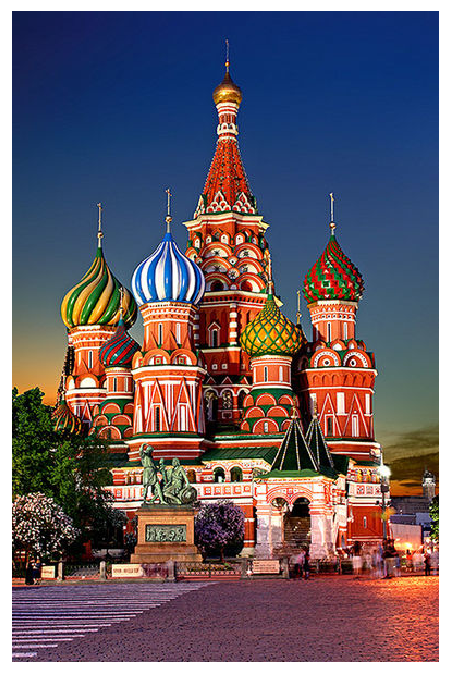

In [3]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [4]:
img.shape

(600, 394, 3)

In [5]:
img_data = (img / 255.0).reshape(600 * 394, 3) # .reshape(-1, 3)
img_data.shape

(236400, 3)

### Visualizing the Color Space using Point Clouds
---

In [6]:
from plot_utils import plot_utils

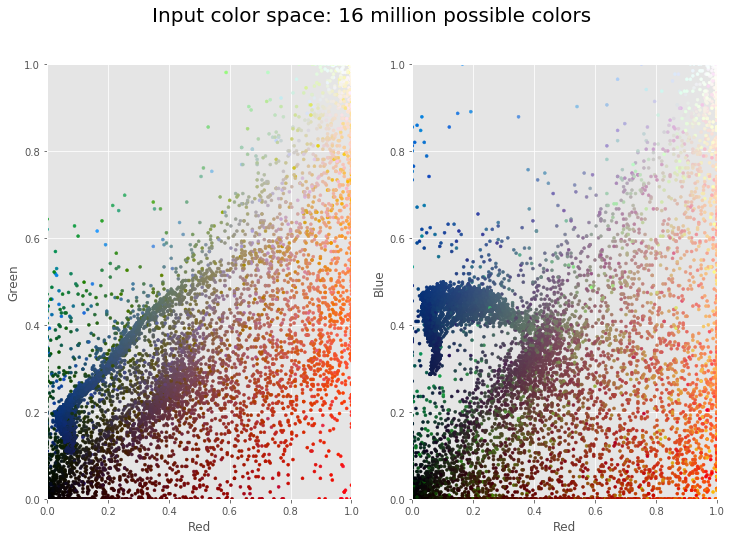

In [7]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()

### Visualizing the K-means Reduced Color Space
---

<a title="Incheol [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif"><img width="300" alt="Kmeans animation" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Kmeans_animation.gif"></a>
<h5 align="center">Incheol [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif">via Wikimedia Commons</a></h5>

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

In [8]:
from sklearn.cluster import MiniBatchKMeans

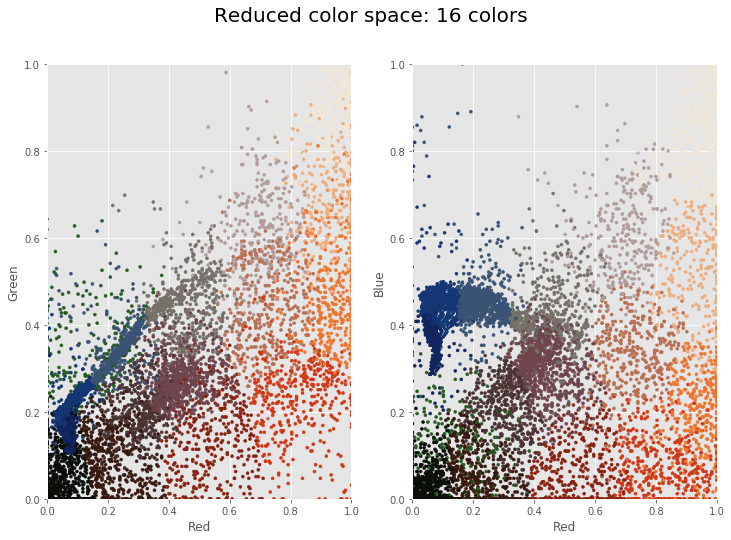

In [9]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

### K-means Image Compression with Interactive Controls
---

In [10]:
img_dir = 'images/'

In [11]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…